<a href="https://colab.research.google.com/github/RobertoAvila15/Finanzas-Computacionales/blob/main/Taller_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Taller 1


*   Roberto José Ávila Moreno

*   Salim Abou-Ammar Garcia




###Librerias

In [ ]:
# Librerias
import pandas as pd
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt
!pip install --quiet yfinance 
import yfinance as yf

In [63]:
import pandas_datareader.data as pdr

In [ ]:
!pip install pandas_datareader
import pandas_datareader as pdr

In [65]:
from pandas_datareader import wb
from datetime import datetime

###Punto 1

####Subida de datos

Por un lado, cargamos la accion de Raytheon Technologies (RTX), una empresa estadounidense dedicada al negocio aeroespacial y militar.

In [66]:
precios_1_RTX = yf.download("RTX",start="2021-01-01",end="2022-12-31",period="1D")['Adj Close']
precios_1_RTX = pd.DataFrame(precios_1_RTX)
precios_1_RTX

[*********************100%***********************]  1 of 1 completed


,Adj Close
Date,
2021-01-04,65.280037
2021-01-05,66.224472
2021-01-06,67.044884
2021-01-07,66.567902
2021-01-08,66.644203
...,...
2022-12-23,99.300003
2022-12-27,99.660004
2022-12-28,99.139999


Por otro lado, cargamos la accion de Abbott Laboratories (ABT), una empresa farmaceutica estadounidense.

In [67]:
precios_1_ABT = yf.download("ABT",start="2021-01-01",end="2022-12-31",period="1D")['Adj Close']
precios_1_ABT = pd.DataFrame(precios_1_ABT)
precios_1_ABT

[*********************100%***********************]  1 of 1 completed


,Adj Close
Date,
2021-01-04,105.199547
2021-01-05,106.501160
2021-01-06,106.279411
2021-01-07,107.311073
2021-01-08,107.609940
...,...
2022-12-23,107.692398
2022-12-27,108.080643
2022-12-28,107.343979


#### **a.** Calculo de Retornos Logaritmicos

#####Diarios

#####RTX

In [68]:
ret_diarios_RTX = pd.DataFrame(np.log(precios_1_RTX/precios_1_RTX.shift(1)).dropna())
ret_diarios_RTX = ret_diarios_RTX.rename(columns={'Adj Close':'Retorno Diario RTX'})
ret_diarios_RTX

,Retorno Diario RTX
Date,
2021-01-05,0.014364
2021-01-06,0.012312
2021-01-07,-0.007140
2021-01-08,0.001146
2021-01-11,-0.000859
...,...
2022-12-23,0.007988
2022-12-27,0.003619
2022-12-28,-0.005231


#####ABT

In [69]:
ret_diarios_ABT = pd.DataFrame(np.log(precios_1_ABT/precios_1_ABT.shift(1)).dropna())
ret_diarios_ABT = ret_diarios_ABT.rename(columns={'Adj Close':'Retorno Diario ABT'})
ret_diarios_ABT

,Retorno Diario ABT
Date,
2021-01-05,0.012297
2021-01-06,-0.002084
2021-01-07,0.009660
2021-01-08,0.002781
2021-01-11,-0.006923
...,...
2022-12-23,0.001388
2022-12-27,0.003599
2022-12-28,-0.006839


#####Mensuales

#####RTX

In [70]:
ret_mensuales_RTX = pd.DataFrame(ret_diarios_RTX*21)
ret_mensuales_RTX = ret_mensuales_RTX.rename(columns={'Adj Close':'Retorno Mensual RTX'})
ret_mensuales_RTX

,Retorno Diario RTX
Date,
2021-01-05,0.301640
2021-01-06,0.258557
2021-01-07,-0.149936
2021-01-08,0.024057
2021-01-11,-0.018036
...,...
2022-12-23,0.167738
2022-12-27,0.075995
2022-12-28,-0.109860


#####ABT

In [71]:
ret_mensuales_ABT = pd.DataFrame(ret_diarios_ABT*21)
ret_mensuales_ABT = ret_mensuales_ABT.rename(columns={'Adj Close':'Retorno Mensual ABT'})
ret_mensuales_ABT

,Retorno Diario ABT
Date,
2021-01-05,0.258235
2021-01-06,-0.043770
2021-01-07,0.202865
2021-01-08,0.058405
2021-01-11,-0.145380
...,...
2022-12-23,0.029138
2022-12-27,0.075571
2022-12-28,-0.143623


#####Anualizados

#####RTX

In [72]:
ret_anuales_RTX = pd.DataFrame(ret_diarios_RTX*252)
ret_anuales_RTX = ret_anuales_RTX.rename(columns={'Adj Close':'Retorno Anual RTX'})
ret_anuales_RTX

,Retorno Diario RTX
Date,
2021-01-05,3.619674
2021-01-06,3.102684
2021-01-07,-1.799229
2021-01-08,0.288682
2021-01-11,-0.216430
...,...
2022-12-23,2.012854
2022-12-27,0.911945
2022-12-28,-1.318324


#####ABT

In [73]:
ret_anuales_ABT = pd.DataFrame(ret_diarios_ABT*252)
ret_anuales_ABT = ret_anuales_ABT.rename(columns={'Adj Close':'Retorno Anual ABT'})
ret_anuales_ABT

,Retorno Diario ABT
Date,
2021-01-05,3.098814
2021-01-06,-0.525242
2021-01-07,2.434386
2021-01-08,0.700856
2021-01-11,-1.744555
...,...
2022-12-23,0.349657
2022-12-27,0.906858
2022-12-28,-1.723480


#####Tabla de Retornos

In [74]:
ret_diarios_RTX_Tabla = ret_diarios_RTX.rename(columns={'Adj Close':'Retorno Diario RTX'})
ret_diarios_RTX_Tabla["Retorno Diario ABT"] = ret_diarios_ABT
ret_diarios_RTX_Tabla["Retorno Mensual RTX"] = ret_mensuales_RTX
ret_diarios_RTX_Tabla["Retorno Mensual ABT"] = ret_mensuales_ABT
ret_diarios_RTX_Tabla["Retorno Anual RTX"] = ret_anuales_RTX
ret_diarios_RTX_Tabla["Retorno Anual ABT"] = ret_anuales_ABT

En la siguiente tabla encontramos el resumen de los retornos diarios, mensuales y anuales de la accion de Raytheon Technologies (RTX) y Abbott Laboratories (ABT)

In [75]:
Tabla_Retornos = ret_diarios_RTX_Tabla
Tabla_Retornos

,Retorno Diario RTX,Retorno Diario ABT,Retorno Mensual RTX,Retorno Mensual ABT,Retorno Anual RTX,Retorno Anual ABT
Date,,,,,,
2021-01-05,0.014364,0.012297,0.301640,0.258235,3.619674,3.098814
2021-01-06,0.012312,-0.002084,0.258557,-0.043770,3.102684,-0.525242
2021-01-07,-0.007140,0.009660,-0.149936,0.202865,-1.799229,2.434386
2021-01-08,0.001146,0.002781,0.024057,0.058405,0.288682,0.700856
2021-01-11,-0.000859,-0.006923,-0.018036,-0.145380,-0.216430,-1.744555
...,...,...,...,...,...,...
2022-12-23,0.007988,0.001388,0.167738,0.029138,2.012854,0.349657
2022-12-27,0.003619,0.003599,0.075995,0.075571,0.911945,0.906858
2022-12-28,-0.005231,-0.006839,-0.109860,-0.143623,-1.318324,-1.723480


#### **b.** Retornos Esperado y Volatilidades Anualizadas

#####Retornos Esperados Diarios, Mensuales y Anuales

In [76]:
Tabla_Retornos.mean()

Retorno Diario RTX     0.000868
Retorno Diario ABT     0.000076
Retorno Mensual RTX    0.018224
Retorno Mensual ABT    0.001598
Retorno Anual RTX      0.218689
Retorno Anual ABT      0.019173
dtype: float64

Vemos Una gran superioridad de los retornos de la accion Raytheon Technologies (RTX) frente a los retornos de la accion Abbott Laboratories (ABT), tanto diario como mensual y anual, vemos un mayor retorno esperado en esta accion antes dicha.

#####Volatilidades Anualizadas (Volatilidad Close-to-close: desviación estándar)

#####Diaria (RTX)

In [77]:
Vol_RTX_Diaria = ret_diarios_RTX.std()
Vol_RTX_Diaria

Retorno Diario RTX    0.0153
dtype: float64

#####Anual (RTX)

In [78]:
Vol_RTX_Diaria*np.sqrt(252)

Retorno Diario RTX    0.242875
dtype: float64

#####Diaria (ABT)

In [79]:
Vol_ABT_Diaria = ret_diarios_ABT.std()
Vol_ABT_Diaria

Retorno Diario ABT    0.015269
dtype: float64

#####Anual (ABT)

In [80]:
Vol_ABT_Diaria*np.sqrt(252)

Retorno Diario ABT    0.242381
dtype: float64

La volatilidad de Raytheon Technologies (RTX) y Abbott Laboratories (ABT) es similar tanto diaria como anual. Con esto vemos que la de Raytheon Technologies (RTX) tiene un mayor retorno que Abbott Laboratories (ABT) y ambas tienen la misma volatilidad (riesgo)

#### **c.** Tabla Resumen Con las Estadisticas Descriptivas

#####Retornos Diarios de RTX y ABT

#####Principales estadisticas descriptivas (RTX y ABT)

In [81]:
Tabla_Resumen = ret_diarios_RTX.describe()
Tabla_Resumen = Tabla_Resumen.rename(columns={'Retorno Diario RTX':'RTX'})

In [82]:
Tabla_Resumen['ABT'] = pd.DataFrame(ret_diarios_ABT.describe())
Tabla_Resumen

,RTX,ABT
count,502.000000,502.000000
mean,0.000868,0.000076
std,0.015300,0.015269
min,-0.051501,-0.097722
25%,-0.007994,-0.007698
50%,0.000676,0.000913
75%,0.008595,0.009102
max,0.048539,0.051997


Con las estadisticas descriptivas vemos que el retorno esperado de RTX es mayor al retorno esperado de ABT, ademas logramos ver que tienen una desviación estándar (volatilidad-riesgo) es similar en las 2 acciones, ambas con un valor de 0.015 esto quiere decir que en promedio los datos se mueven en promedio 0.015 respecto a la media. Por ultimo tenemos un retorno maximo de RTX de 0.048 y de ABT de 0.051, y un retorno minimo de -0.051 para RTX y -0.097 para ABT. Tenemos 502 datos

#####Sesgo y Curtosis (RTX y ABT)

#####Curtosis

In [83]:
Curtosis = pd.DataFrame(ret_diarios_RTX.kurtosis())
Curtosis.index = ['Curtosis']
Curtosis = Curtosis.rename(columns={0:'RTX'})

In [84]:
Curtosis_ABT = pd.DataFrame(ret_diarios_ABT.kurtosis())
Curtosis_ABT.index = ['Curtosis']
Curtosis_ABT = Curtosis_ABT.rename(columns={0:'ABT'})

In [85]:
Curtosis['ABT'] = Curtosis_ABT
Curtosis

,RTX,ABT
Curtosis,1.098107,3.99056


Como vemos ABT y RTX son leptocurticas, al tener un resultado mayor a 0, lo que quiere decir que los datos estan concentrados alrededor de la media.

#####Sesgo

In [86]:
Sesgo = pd.DataFrame(ret_diarios_RTX.skew())
Sesgo.index = ['Sesgo']
Sesgo = Sesgo.rename(columns={0:'RTX'})

In [87]:
Sesgo_ABT = pd.DataFrame(ret_diarios_ABT.skew())
Sesgo_ABT.index = ['Sesgo']
Sesgo_ABT = Sesgo_ABT.rename(columns={0:'ABT'})

In [88]:
Sesgo['ABT'] = Sesgo_ABT
Sesgo

,RTX,ABT
Sesgo,0.069304,-0.655611


Como vemos ABT da como resultado un sesgo negativo (Sesgo<0), lo que quiere decir que es asimetrico a la derecha, por lo que los datos de distribuyen en su mayoria a la izquierda de la media (Retornos Negativos). Por otro lado vemos RTX da como resultado un sesgo positivo (Sesgo>0), lo que quiere decir que es asimetrico a la izquierda, por lo que los datos de distribuyen en su mayoria a la derecha de la media (Retornos Positivos).

#### **d.** Distribuciones

#####Comparación de la Distribución de los 2 Activos (RTX y ABT)

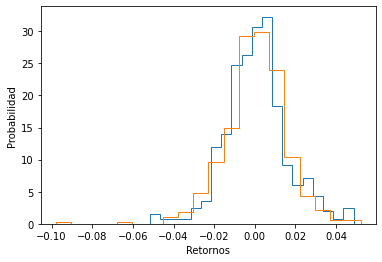

In [89]:
plt.hist(ret_diarios_RTX['Retorno Diario RTX'],bins=20,density=True,histtype="step");
plt.hist(ret_diarios_ABT['Retorno Diario ABT'],bins=20,density=True,histtype="step");
plt.xlabel("Retornos");
plt.ylabel("Probabilidad");

Vemos que las 2 acciones de distribuyen de forma silimar, sin embargo los retornos diarios de ABT tienden mas hacia la izquierda del 0, teniendo grandes outlayers hacia este lado. Y por otro lado los retornos diarios de RTX tienen mas hacia la derecha del 0.

#####Comparación de la Distribución de RTX con la Distribución Normal

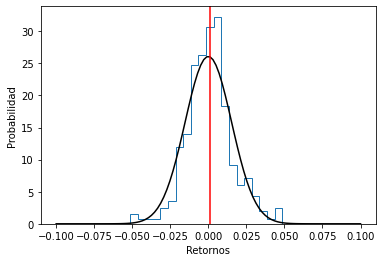

In [90]:
from scipy.stats import norm
x = np.linspace(-0.1,0.1,num=100)

plt.hist(ret_diarios_RTX['Retorno Diario RTX'],bins=20,density=True,histtype="step");
plt.plot(x,norm.pdf(x,scale=ret_diarios_RTX['Retorno Diario RTX'].std()),'k')
plt.axvline(ret_diarios_RTX['Retorno Diario RTX'].mean(),color="Red")
plt.xlabel("Retornos");
plt.ylabel("Probabilidad");

Como vemos la dsitribucion de los retornos diarios de RTX se distribuye de manera muy similar a la distribucion normal, sin embargo no igual, ya que vemos mas tendencia de los retornos diarios de RTX hacia la derecha del 0

#####Comparación de la Distribución de ABT con la Distribución Normal

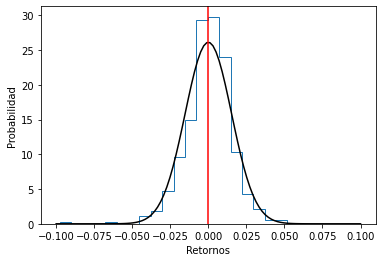

In [91]:
from scipy.stats import norm
x = np.linspace(-0.1,0.1,num=100)

plt.hist(ret_diarios_ABT['Retorno Diario ABT'],bins=20,density=True,histtype="step");
plt.plot(x,norm.pdf(x,scale=ret_diarios_ABT['Retorno Diario ABT'].std()),'k')
plt.axvline(ret_diarios_ABT['Retorno Diario ABT'].mean(),color="Red")
plt.xlabel("Retornos");
plt.ylabel("Probabilidad");

Como vemos la dsitribucion de los retornos diarios de ABT se distribuye de manera muy similar a la distribucion normal, sin embargo no igual, ya que vemos mas tendencia hacia la izquierza del 0

#### **e.** Correlaciones

#####Pearson

In [92]:
activos_1_corr = ["RTX", "ABT"]
precios_1_corr = yf.download(activos_1_corr,start="2021-01-01",end="2022-12-31",period="1D")['Adj Close']
precios_1_corr

[*********************100%***********************]  2 of 2 completed


,ABT,RTX
Date,,
2021-01-04,105.199547,65.280052
2021-01-05,106.501160,66.224472
2021-01-06,106.279411,67.044876
2021-01-07,107.311066,66.567902
2021-01-08,107.609962,66.644218
...,...,...
2022-12-23,107.692398,99.300003
2022-12-27,108.080643,99.660004
2022-12-28,107.343979,99.139999


In [93]:
ret_diarios_corr = pd.DataFrame(np.log(precios_1_corr/precios_1_corr.shift(1)).dropna())
ret_diarios_corr

,ABT,RTX
Date,,
2021-01-05,0.012297,0.014364
2021-01-06,-0.002084,0.012312
2021-01-07,0.009660,-0.007140
2021-01-08,0.002781,0.001146
2021-01-11,-0.006923,-0.000859
...,...,...
2022-12-23,0.001388,0.007988
2022-12-27,0.003599,0.003619
2022-12-28,-0.006839,-0.005231


In [94]:
ret_diarios_corr.corr(method="pearson")

,ABT,RTX
ABT,1.000000,0.280441
RTX,0.280441,1.000000


#####Rango de Kendall

In [95]:
import scipy.stats as stats

In [96]:
stats.kendalltau(ret_diarios_RTX, ret_diarios_ABT)

KendalltauResult(correlation=0.16445393422217394, pvalue=3.6354540157699366e-08)

#####Spearman

In [97]:
stats.spearmanr(ret_diarios_RTX, ret_diarios_ABT)

SpearmanrResult(correlation=0.23805054664266312, pvalue=6.73491890934e-08)

Como vemos en los 3 metodos de calculo de correlaciones, la correlacion no da un resultado mayor a 0.3, con lo que vemos que es una correlacion positiva pero no es muy alta por lo que las 2 compañias se relacionan poco entre si.

#### **f.** Pruebas de Normalidad (Kolmogorov-Smirnov)

In [98]:
#No

###Punto 2

####Subida de datos

In [99]:
activos_2 = ["WMT","XOM","VRTX","VZ","NUE","PM","LMT","CAT","SPG","UNP"]
precios_2 = yf.download(activos_2,start="2017-12-01",end="2022-12-31",period="1Mo")['Adj Close']
precios_2

[*********************100%***********************]  10 of 10 completed


,CAT,LMT,NUE,PM,SPG,UNP,VRTX,VZ,WMT,XOM
Date,,,,,,,,,,
2017-12-01,124.465027,274.806000,50.114414,77.655029,123.822510,112.125542,140.789993,40.159332,88.377594,64.171906
2017-12-04,124.447456,273.237183,51.443798,78.328918,124.829269,117.038132,138.789993,40.527634,88.068924,64.256493
2017-12-05,123.251343,271.799988,50.411770,78.965370,124.127579,115.175659,138.360001,39.900742,88.813339,63.733635
2017-12-06,123.427238,273.403870,50.674152,80.567757,124.135216,115.121674,137.279999,39.712692,88.314026,63.264633
2017-12-07,125.669930,275.550934,51.242641,79.893852,123.608955,115.580536,138.779999,39.508957,88.323151,63.472210
...,...,...,...,...,...,...,...,...,...,...
2022-12-23,238.731461,483.290009,135.562820,101.690002,117.910004,209.910004,289.690002,37.815506,143.770004,108.680000
2022-12-27,241.985947,485.500000,136.021057,102.680000,118.099998,210.320007,287.320007,38.642506,143.809998,110.190002
2022-12-28,238.243805,483.220001,133.680008,100.940002,115.059998,206.869995,285.760010,38.209316,141.289993,108.379997


#### **a.** Calculo de Retornos Logaritmicos y Volatilidades Anualizados

#####Mensuales

######Retornos

In [100]:
Retorno_Mensual_Activos_2 = pd.DataFrame(np.log(precios_2/precios_2.shift(1)).dropna())
Retorno_Mensual_Activos_2

,CAT,LMT,NUE,PM,SPG,UNP,VRTX,VZ,WMT,XOM
Date,,,,,,,,,,
2017-12-04,-0.000141,-0.005725,0.026181,0.008641,0.008098,0.042881,-0.014307,0.009129,-0.003499,0.001317
2017-12-05,-0.009658,-0.005274,-0.020265,0.008093,-0.005637,-0.016041,-0.003103,-0.015589,0.008417,-0.008170
2017-12-06,0.001426,0.005884,0.005191,0.020089,0.000062,-0.000469,-0.007836,-0.004724,-0.005638,-0.007386
2017-12-07,0.018007,0.007822,0.011156,-0.008400,-0.004248,0.003978,0.010867,-0.005143,0.000103,0.003276
2017-12-08,0.006766,0.004538,0.026610,-0.001031,0.001110,0.005047,0.034211,0.013201,-0.002379,0.001332
...,...,...,...,...,...,...,...,...,...,...
2022-12-23,0.009761,0.008290,-0.006081,0.008196,0.013233,0.005973,-0.014496,0.002607,0.002019,0.026101
2022-12-27,0.013540,0.004562,0.003375,0.009688,0.001610,0.001951,-0.008215,0.021634,0.000278,0.013798
2022-12-28,-0.015585,-0.004707,-0.017361,-0.017091,-0.026078,-0.016540,-0.005444,-0.011273,-0.017678,-0.016563


######Volatilidades

In [101]:
Vol_Mensual_Activos_2 = Retorno_Mensual_Activos_2.std()
Vol_Mensual_Activos_2

CAT     0.021007
LMT     0.016952
NUE     0.024840
PM      0.017531
SPG     0.029873
UNP     0.018065
VRTX    0.021280
VZ      0.012514
WMT     0.014725
XOM     0.021177
dtype: float64

#####Anualizados

######Retornos

In [102]:
Rertorno_Diario_Activos_2 = Retorno_Mensual_Activos_2/21
Retorno_Anual_Activos_2 = Rertorno_Diario_Activos_2*252
Retorno_Anual_Activos_2

,CAT,LMT,NUE,PM,SPG,UNP,VRTX,VZ,WMT,XOM
Date,,,,,,,,,,
2017-12-04,-0.001694,-0.068702,0.314175,0.103687,0.097173,0.514568,-0.171689,0.109550,-0.041985,0.015807
2017-12-05,-0.115895,-0.063285,-0.243183,0.097110,-0.067645,-0.192496,-0.037236,-0.187070,0.101005,-0.098044
2017-12-06,0.017113,0.070603,0.062295,0.241069,0.000738,-0.005626,-0.094036,-0.056689,-0.067655,-0.088632
2017-12-07,0.216085,0.093869,0.133873,-0.100795,-0.050981,0.047736,0.130408,-0.061721,0.001240,0.039309
2017-12-08,0.081188,0.054451,0.319321,-0.012377,0.013324,0.060563,0.410536,0.158410,-0.028553,0.015981
...,...,...,...,...,...,...,...,...,...,...
2022-12-23,0.117133,0.099483,-0.072970,0.098347,0.158794,0.071673,-0.173955,0.031282,0.024230,0.313217
2022-12-27,0.162484,0.054749,0.040495,0.116260,0.019321,0.023416,-0.098577,0.259603,0.003338,0.165581
2022-12-28,-0.187021,-0.056487,-0.208329,-0.205093,-0.312936,-0.198476,-0.065331,-0.135282,-0.212142,-0.198752


######Volatilidades

In [103]:
Vol_Anual_Activos_2 = Vol_Mensual_Activos_2*np.sqrt(12)
Vol_Anual_Activos_2

CAT     0.072770
LMT     0.058723
NUE     0.086050
PM      0.060728
SPG     0.103484
UNP     0.062578
VRTX    0.073718
VZ      0.043349
WMT     0.051010
XOM     0.073361
dtype: float64

#### **b.** Tabla de Activos Dependiendo del Desempeño de los Retornos

#####Nuestro Analisis se baso en los Retornos Esperados Anuales (Promedio de los Retornos Anuales)

In [104]:
Desempeño_Retornos = pd.DataFrame(Retorno_Anual_Activos_2.mean())
Desempeño_Retornos = Desempeño_Retornos.rename(columns={0:'Promedio de Retornos Anuales'})
Desempeño_Retornos

,Promedio de Retornos Anuales
CAT,0.006103
LMT,0.005363
NUE,0.009080
PM,0.002488
SPG,-0.000494
UNP,0.005760
VRTX,0.006746
VZ,-0.000326
WMT,0.004439
XOM,0.005086


Organización de la tabla de mayor a menor, para ver el ranqueo de cuales de los activos seleccionados tienen los mejores retornos y asi poder concluir.

In [105]:
Desempeño_Retornos.sort_values('Promedio de Retornos Anuales', ascending=False)

,Promedio de Retornos Anuales
NUE,0.009080
VRTX,0.006746
CAT,0.006103
UNP,0.005760
LMT,0.005363
XOM,0.005086
WMT,0.004439
PM,0.002488
VZ,-0.000326
SPG,-0.000494


Vemos que el mejor desempeño de los retornos de las acciones la tuvo Nucor Corporatio (NUE), la cual es una empresa de acero estadounidense, luego le sigue la accion de Vertex pharmaceuticals inc, una empresa farmaceutica de los Estados Unidos, y en tercer lugar tenemos Caterpillar (CAT) una empresa del sector de maquinaria para construccion y al igual que las anteriores, estadounidense.

###Punto 3

####Subida de datos

Cargamos el indice Rusell 2000, el cual es un indice que contiene 2000 empresas estadounidenses de baja capitalización.

In [106]:
precios_3 = yf.download("^RUT",start="2011-12-01",end="2022-12-31", period="1Mo")
precios_3

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2011-12-01,734.510010,739.960022,730.750000,730.750000,730.750000,3818680000
2011-12-02,738.559998,744.960022,734.140015,735.020020,735.020020,4144310000
2011-12-05,743.640015,752.710022,741.590027,747.030029,747.030029,4148060000
2011-12-06,746.650024,751.809998,740.890015,746.780029,746.780029,3734230000
2011-12-07,746.750000,749.000000,732.159973,746.140015,746.140015,4160540000
...,...,...,...,...,...,...
2022-12-23,1753.199951,1761.239990,1743.739990,1760.930054,1760.930054,2819280000
2022-12-27,1761.380005,1761.650024,1745.439941,1749.520020,1749.520020,3030300000
2022-12-28,1749.930054,1753.930054,1722.020020,1722.020020,1722.020020,3083520000


#### **a.** Calculo de Volatilidad Mensual y Anualizada

##### **1.** Desviacián Estándar

Se calculo con los Retornos Mensuales del Indice

#####Calculo de Retornos

In [107]:
Retorno_Mensual_Rus_3 = np.log(precios_3['Adj Close']/precios_3['Adj Close'].shift(1)).dropna()
Retorno_Mensual_Rus_3

Date
2011-12-02    0.005826
2011-12-05    0.016208
2011-12-06   -0.000335
2011-12-07   -0.000857
2011-12-08   -0.031947
                ...   
2022-12-23    0.003892
2022-12-27   -0.006501
2022-12-28   -0.015843
2022-12-29    0.025361
2022-12-30   -0.002835
Name: Adj Close, Length: 2788, dtype: float64

#####Mensual

In [108]:
Vol_Mensual_Rus_3_std = Retorno_Mensual_Rus_3.std()
Vol_Mensual_Rus_3_std

0.013800304260798988

#####Anualizada

In [109]:
Vol_Anual_Rus_3_std = Vol_Mensual_Rus_3_std*np.sqrt(12)
Vol_Anual_Rus_3_std

0.04780565627922621

##### **2.** Parkinson

#####Mensual

In [110]:
lnHL = np.log(precios_3["High"]/precios_3["Low"]).dropna()
Vol_Mensual_Rus_3_Park = ((1/(4*np.log(2)))*lnHL**2)**0.5
Vol_Mensual_Rus_3_Park

Date
2011-12-01    0.007522
2011-12-02    0.008787
2011-12-05    0.008938
2011-12-06    0.008787
2011-12-07    0.013657
                ...   
2022-12-23    0.005997
2022-12-27    0.005552
2022-12-28    0.011027
2022-12-29    0.013946
2022-12-30    0.005713
Length: 2789, dtype: float64

#####Anualizada

In [111]:
Vol_Anual_Rus_3_Park = (Vol_Mensual_Rus_3_Park.mean())*np.sqrt(12)
Vol_Anual_Rus_3_Park

0.030161261792894894

##### **3.** Garman-Klass

#####Mensual

In [112]:
lnHL = np.log(precios_3["High"]/precios_3["Low"]).dropna()
lnCO = np.log(precios_3["Close"]/precios_3["Open"]).dropna()
Vol_Mensual_Rus_3_GarmK = (0.5*lnHL**2-(2*np.log(2)-1)*lnCO**2)**0.5
Vol_Mensual_Rus_3_GarmK

Date
2011-12-01    0.008262
2011-12-02    0.009905
2011-12-05    0.010137
2011-12-06    0.010345
2011-12-07    0.016072
                ...   
2022-12-23    0.006510
2022-12-27    0.005010
2022-12-28    0.008289
2022-12-29    0.008822
2022-12-30    0.006690
Length: 2789, dtype: float64

#####Anualizada

In [113]:
Vol_Anual_Rus_3_GarmK = (Vol_Mensual_Rus_3_GarmK.mean())*np.sqrt(12)
Vol_Anual_Rus_3_GarmK

0.02809434772311538

##### **4.** Volatilidad ponderada exponencial (EWMA) con una lambda de 0.94.

#####Opcional Grupo 105i

Se calculo con los Retornos Mensuales del Indice

#####Mensual

#####Valor de Lambda

In [114]:
#Calculo de JP Morgan
Lambda = 0.94
Lambda

0.94

#####Valor de k

In [115]:
k = len(Retorno_Mensual_Rus_3)
k

2788

#####Valor de t

In [116]:
t = np.arange(k-1,-1,-1)
t

array([2787, 2786, 2785, ...,    2,    1,    0])

#####Calcular Alfa

In [117]:
Alfa = Lambda**t
Alfa

array([1.28034787e-75, 1.36207220e-75, 1.44901298e-75, ...,
       8.83600000e-01, 9.40000000e-01, 1.00000000e+00])

#####Volatilidad EWMA

#####Varianza (Mensual)

In [118]:
varianza_EWMA = ((1-Lambda))*((Retorno_Mensual_Rus_3**2*Alfa).sum())
varianza_EWMA

0.00022503837581540806

#####Desviación Estándar (Volatilidad) (Mensual)

In [119]:
sigma_EWMA = np.sqrt(varianza_EWMA)
sigma_EWMA

0.015001279139307024

#####Anualizada

In [120]:
sigma_EWMA_Anual = sigma_EWMA*np.sqrt(12)
sigma_EWMA_Anual

0.05196595529560576

#####Analisis Volatilidad de los Retornos (Desv Estándar y EWMA)

Para el analisis de la volatilidad de los retornos usamos la desviación estándar, la cual nos da como resultado una volatilidad anual de 0.0478 y usando la EWMA nos dio como resultado una volatilidad de 0.051. Por lo que concluimos que la volatilidad de los retornos es relativamente alta y nos dan resultados muy parecidos con los 2 modelos de volatilidad.

#####Analisis Volatilidad de los Precios (Parkinson y Garman-Klass)

Para el analisis de la volatilidad de los precios usamos el modelo de volatilidad parkinson, el cual nos da como resultado una volatilidad anual de 0.030 y usando el modelo de volatilidad Garman-Klass nos dio como resultado una volatilidad de 0.028. Por lo que concluimos que la volatilidad de los precios no es tan alta y nos dan resultados muy parecidos con los 2 modelos de volatilidades.